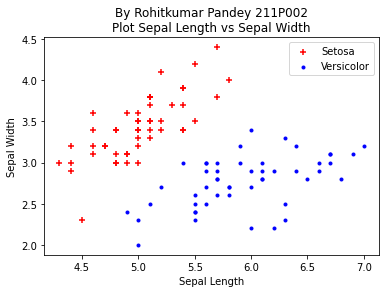

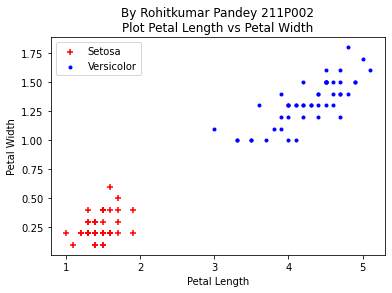

Prediction for input [4.8, 3.0, 1.5, 0.3]: setosa


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load Iris dataset and create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Split dataset by class
df0, df1, df2 = df[:50], df[50:100], df[100:]

# Plot Sepal and Petal dimensions for Setosa and Versicolor
def plot_dimensions(x, y, xlabel, ylabel, title):
    plt.title(f"By Rohitkumar Pandey 211P002\n{title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(df0[x], df0[y], color="red", marker='+', label="Setosa")
    plt.scatter(df1[x], df1[y], color="blue", marker='.', label="Versicolor")
    plt.legend()
    plt.show()

plot_dimensions('sepal length (cm)', 'sepal width (cm)', 'Sepal Length', 'Sepal Width', "Plot Sepal Length vs Sepal Width")
plot_dimensions('petal length (cm)', 'petal width (cm)', 'Petal Length', 'Petal Width', "Plot Petal Length vs Petal Width")

# Prepare training and testing data
X = df.drop(['target', 'flower_name'], axis='columns')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train SVM models with different parameters
models = {
    'default': SVC(),
    'C=1': SVC(C=1),
    'C=10': SVC(C=10),
    'gamma=10': SVC(gamma=10),
    'linear': SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Example prediction
prediction = models['default'].predict([[4.8, 3.0, 1.5, 0.3]])
print(f"Prediction for input [4.8, 3.0, 1.5, 0.3]: {iris.target_names[prediction[0]]}")


In [ ]:
# postlab 1 rohitkumar
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Select fewer features correctly
X = df[['age', 'bmi', 'bp', 's5']]  # 'bp' is blood pressure and 's5' is a selected feature
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model once
model = LinearRegression()
model.fit(X_train, y_train)

# Create the GUI window
window = tk.Tk()
window.title("Diabetes Progression Prediction")
window.geometry("400x400")

# Create input fields for selected features
labels = {
    'age': "Age (years)",
    'bmi': "Body Mass Index (BMI)",
    'bp': "Blood Pressure (mm Hg)",
    's5': "S5 Measurement"
}

entries = []
for i, (key, label_text) in enumerate(labels.items()):
    label = ttk.Label(window, text=label_text + ":")
    label.grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

# Create a button to predict
def predict():
    try:
        # Get input values
        input_values = [float(entry.get()) for entry in entries]
        # Make prediction
        prediction = model.predict([input_values])[0]
        # Display prediction
        result_label.config(text="Disease Progression: {:.2f}".format(prediction))
    except ValueError:
        messagebox.showerror("Input Error", "Invalid input. Please enter valid numbers for all features.")
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred: {str(e)}")

# Create a button to predict
predict_button = ttk.Button(window, text="Predict", command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the prediction
result_label = ttk.Label(window, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, padx=5, pady=5)

# Create a reset button to clear inputs
def reset():
    for entry in entries:
        entry.delete(0, tk.END)
    result_label.config(text="")

reset_button = ttk.Button(window, text="Reset", command=reset)
reset_button.grid(row=len(labels) + 2, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()
